In [4]:
from tkinter import TRUE
import pandas as pd
df = pd.read_csv('D:/Study material/python code/Project/data/most_runs_average_strikerate.csv')
df.describe()

,total_runs,out,numberofballs,average,strikerate
count,516.000000,516.000000,516.000000,482.000000,516.000000
mean,430.625969,17.063953,335.645349,16.355074,105.433442
std,882.275431,28.124511,663.593679,11.146222,39.633938
min,0.000000,0.000000,1.000000,0.000000,0.000000
25%,15.000000,2.000000,17.000000,8.000000,84.362069
50%,74.000000,5.500000,68.000000,14.607143,111.651584
75%,340.500000,18.000000,290.000000,23.657609,130.499036
max,5426.000000,161.000000,4111.000000,88.000000,250.000000


In [5]:
df.corr()

,total_runs,out,numberofballs,average,strikerate
total_runs,1.000000,0.972650,0.995744,0.556467,0.308024
out,0.972650,1.000000,0.977280,0.506673,0.316884
numberofballs,0.995744,0.977280,1.000000,0.550079,0.292358
average,0.556467,0.506673,0.550079,1.000000,0.626234
strikerate,0.308024,0.316884,0.292358,0.626234,1.000000


Text(0, 0.5, 'Strikerate of batsman')

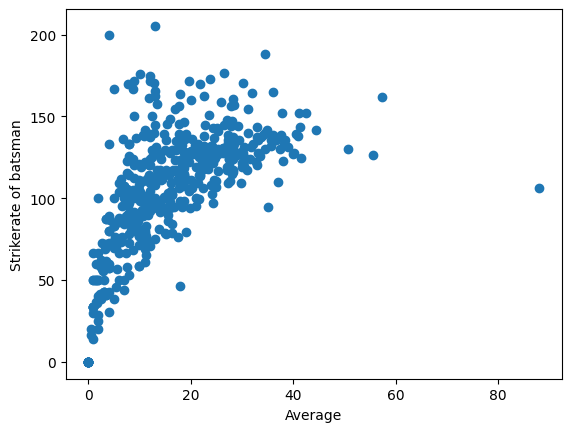

In [6]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(df['average'],df['strikerate'])
plt.xlabel('Average')
plt.ylabel('Strikerate of batsman')

Text(0, 0.5, 'Total Number of Outs')

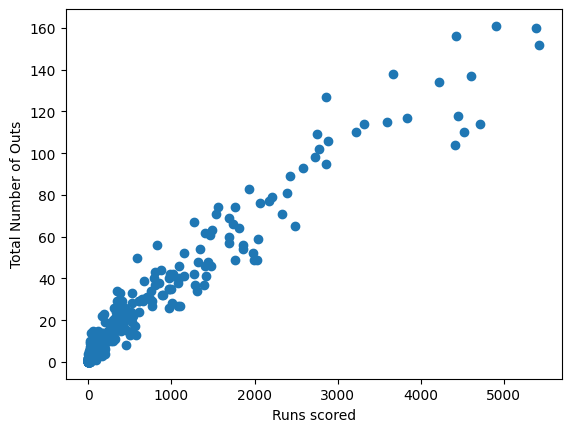

In [7]:
#plotting total runs and number of outs
plt.figure()
plt.scatter(df['total_runs'],df['out'])
plt.xlabel('Runs scored')
plt.ylabel('Total Number of Outs')

<AxesSubplot:>

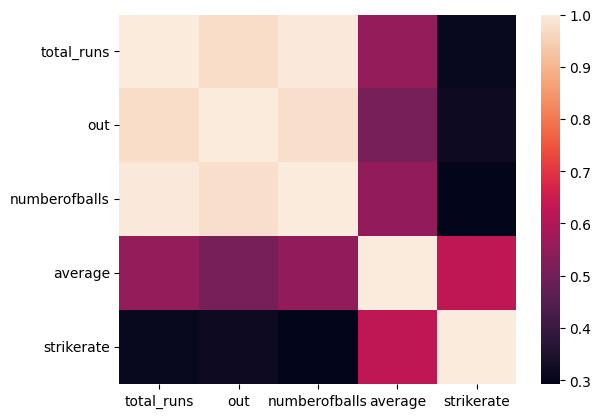

In [8]:
import seaborn as sns
sns.heatmap(df.corr())

In [16]:
#Extracting Features from dataset and imputing of missing values
features =['average','strikerate']
x = df[features]
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()
imputed_x= pd.DataFrame(imputer.fit_transform(x))
imputed_x.columns = x.columns

In [17]:
missing_val_count_by_column = (imputed_x.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

Series([], dtype: int64)


In [18]:
#Clustering of Batsmen based on 


from sklearn.cluster import KMeans
wss=[]
for i in range (1,11):
    kmeanscluster = KMeans(n_clusters = i, init = 'k-means++')
    kmeanscluster.fit(imputed_x)
    kmeanscluster.inertia_
    wss.append(kmeanscluster.inertia_)

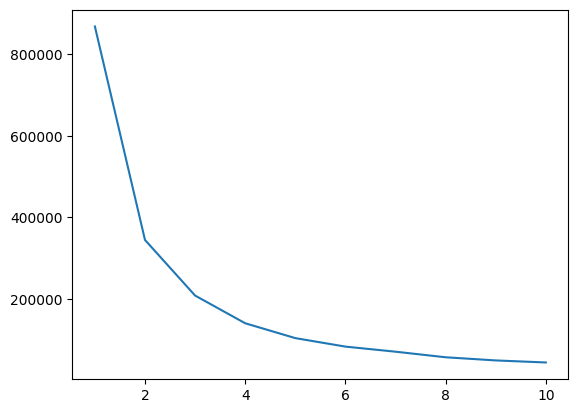

In [19]:
plt.plot(range(1,11), wss)

In [20]:
#Fitting of kmeans clustering
kmeanscluster3 = KMeans(n_clusters= 3, init = 'k-means++')
kmeanscluster4 = KMeans(n_clusters= 4, init = 'k-means++')
y3=kmeanscluster3.fit_predict(imputed_x)
y4 = kmeanscluster4.fit_predict(imputed_x)

In [21]:
#Printing the centers of clusters
centers3 = kmeanscluster3.cluster_centers_
centers4 = kmeanscluster4.cluster_centers_
print(centers3)
print("------------------------")
print(centers4)

[[ 13.06854763  96.58902807]
 [  4.60161193  37.74714715]
 [ 23.69137679 138.31681412]]
------------------------
[[ 11.36537923  90.00407892]
 [ 20.55041207 170.41938515]
 [  4.54111054  35.88590629]
 [ 22.80828482 126.02778231]]


Text(0, 0.5, 'Strikerate off batsmen')

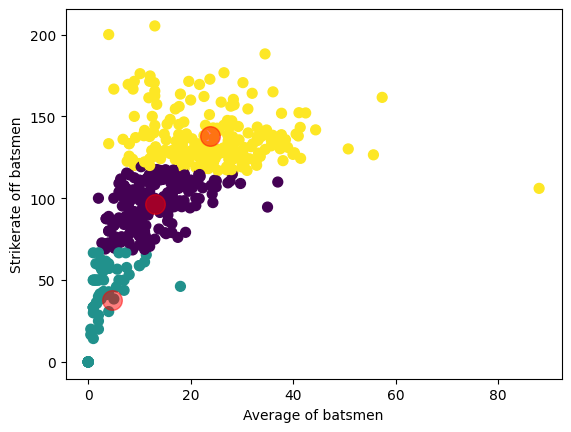

In [24]:
df['Cluster3'] = y3
plt.scatter(df['average'], df['strikerate'],c=y3,s =50,cmap='viridis')
plt.scatter(centers3[:, 0], centers3[:, 1], c='red', s=200, alpha=0.5);
plt.xlabel('Average of batsmen')
plt.ylabel('Strikerate off batsmen')

Text(0, 0.5, 'Strikerate off batsmen')

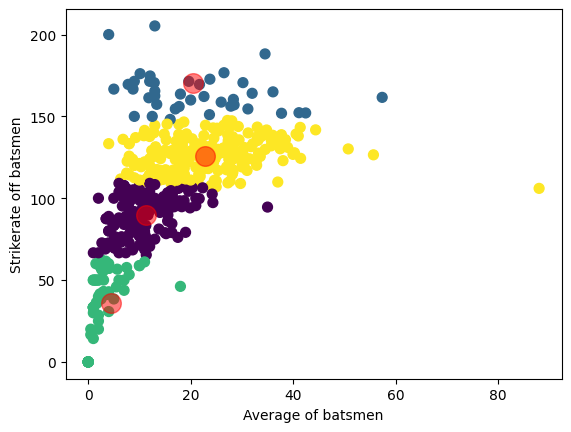

In [25]:
df['Cluster4'] = y4
plt.scatter(df['average'], df['strikerate'],c=y4,s =50,cmap='viridis')
plt.scatter(centers4[:, 0], centers4[:, 1], c='red', s=200, alpha=0.5);
plt.xlabel('Average of batsmen')
plt.ylabel('Strikerate off batsmen')

In [26]:
batsman_cluster_0=df[df['Cluster4']==0]['batsman'].tolist()
batsman_cluster_1=df[df['Cluster4']==1]['batsman'].tolist()
batsman_cluster_2=df[df['Cluster4']==2]['batsman'].tolist()
batsman_cluster_3=df[df['Cluster4']==3]['batsman'].tolist()

In [27]:
print(len(batsman_cluster_0))
print(len(batsman_cluster_1))
print(len(batsman_cluster_2))
print(len(batsman_cluster_3))


160
46
77
233


In [28]:
import numpy as np
data = {'Cluster1_slowpaced':pd.Series(batsman_cluster_0),
       'Cluster2_balanced':pd.Series(batsman_cluster_1),
       'Cluster3_hitters':pd.Series(batsman_cluster_2),
       'Cluster4_bowlers':pd.Series(batsman_cluster_3)}
batsman_cluster = pd.DataFrame(data)
print(batsman_cluster.head())

  Cluster1_slowpaced Cluster2_balanced Cluster3_hitters Cluster4_bowlers
0          CA Pujara          CH Gayle         S Nadeem          V Kohli
1           A Mishra    AB de Villiers         AB Dinda         SK Raina
2            P Kumar          V Sehwag       PJ Sangwan        RG Sharma
3          UBT Chand           RR Pant        YS Chahal        DA Warner
4         SP Goswami        AD Russell         PV Tambe         S Dhawan


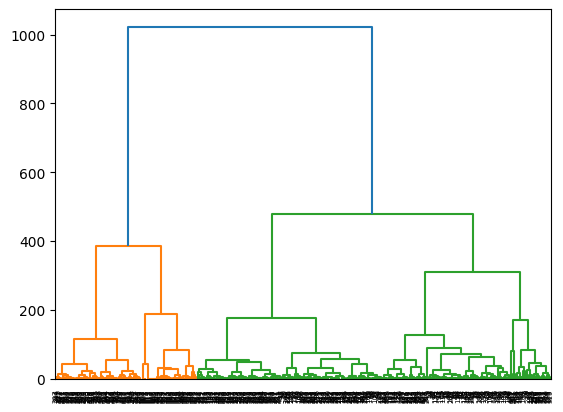

In [29]:
#dendogram to 
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(imputed_x, method='ward'))

In [30]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
y1 = model.fit_predict(imputed_x)

In [31]:
model.cluster_centers_

AttributeError: 'AgglomerativeClustering' object has no attribute 'cluster_centers_'

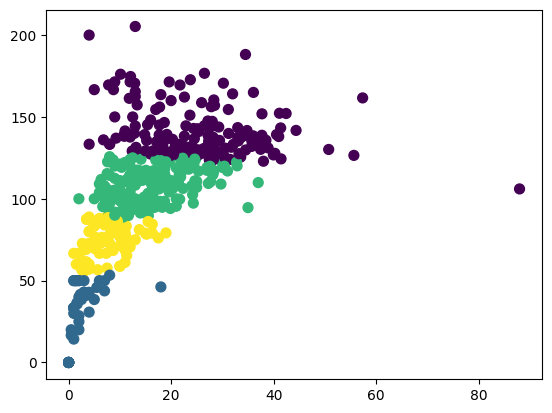

In [33]:
plt.scatter(df['average'], df['strikerate'],c=y1,s =50,cmap='viridis')

In [38]:
df.tail(15)

,batsman,total_runs,out,numberofballs,average,strikerate,Cluster3,Cluster4
501,C Nanda,0,1,1,0.0,0.0,1,2
502,YA Abdulla,0,0,1,NaN,0.0,1,2
503,U Kaul,0,0,1,NaN,0.0,1,2
504,P Raj,0,0,1,NaN,0.0,1,2
505,S Lamichhane,0,1,1,0.0,0.0,1,2
506,RR Bhatkal,0,2,2,0.0,0.0,1,2
507,IC Pandey,0,1,2,0.0,0.0,1,2
508,L Ablish,0,0,2,NaN,0.0,1,2
509,Abdur Razzak,0,0,2,NaN,0.0,1,2
510,Sunny Gupta,0,1,1,0.0,0.0,1,2


In [36]:
df.drop(['Cluster'], axis = 1, inplace= True)